<a href="https://colab.research.google.com/github/focussed/etivity1/blob/master/Etivity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url_train = 'https://raw.githubusercontent.com/focussed/etivity1/master/bank.csv'
df = pd.read_csv(url_train)

First Pass of Data
Gather basic statistics from dataset

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


The describe function treats the numeric fields of the dataset, calculating the useful statistic information such as mean, standard deviation, quartile values and max and min values for the 2000 samples.

A data clean is needed on the input forms as the age is not specified for all customers.  These rows should be identified and values entered.  Age may or may not be necessary for the bank.  However, for the bank to make decisions based on age may result in a false premise if the value is not recorded for all clients in the dataset.

It can be seen that the average balance amount is 1413 and the standard deviation is quite high at 3131



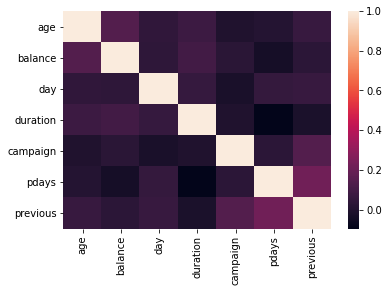

In [4]:
sns.heatmap(df.corr());

The next stage is to consider text based data and examine the individual columns for integrity.



In [5]:
df.dtypes

age           float64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
dtype: object

In [6]:
df.job

0         technician
1         technician
2            retired
3        blue-collar
4            retired
            ...     
1995         student
1996          admin.
1997         retired
1998        services
1999    entrepreneur
Name: job, Length: 2000, dtype: object

In [7]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

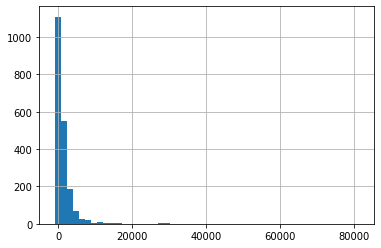

In [8]:
df['balance'].hist(bins=50)

In [22]:
df.loc[(df["job"]=="management") & (df["education"]=="tertiary") & (df["loan"]=="no"), ["job","education","loan"]]

,job,education,loan
8,management,tertiary,no
9,management,tertiary,no
19,management,tertiary,no
21,management,tertiary,no
24,management,tertiary,no
...,...,...,...
1966,management,tertiary,no
1976,management,tertiary,no
1979,management,tertiary,no
1982,management,tertiary,no


In [23]:
df.loc[(df["job"]=="student") & (df["education"]=="secondary") & (df["loan"]=="yes"), ["job","education","loan"]]

,job,education,loan


In [29]:
df.loc[(df["education"]=="tertiary") & (df["loan"]=="yes"), ["job","education","loan"]]

,job,education,loan
37,technician,tertiary,yes
74,management,tertiary,yes
105,technician,tertiary,yes
140,unemployed,tertiary,yes
167,admin.,tertiary,yes
...,...,...,...
1451,management,tertiary,yes
1820,management,tertiary,yes
1943,management,tertiary,yes
1960,management,tertiary,yes
